# Projet sante publique france

## Déjà réalisé



## Analyses univariées

In [1]:
import os
import re
from pprint import pprint

from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
from matplotlib.offsetbox import (TextArea, DrawingArea,
                                  OffsetImage, AnnotationBbox)
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
from tabulate import tabulate
import unicodedata
from wordcloud import WordCloud

from src.features.univar import UnivariateAnalysis
from src.visualization import visualize as viz

plt.rcdefaults()
font = {'size': 18}

sns.set()
plt.rc('font', **font)

In [2]:
%matplotlib inline

In [3]:
pd.options.display.max_rows = 999

In [4]:
# On récupère les données du second traitement
data = pd.read_pickle('../data/interim/products_interimV2.pickle')
univar = UnivariateAnalysis(data)

In [5]:
for col in data.columns:
    print(col)

code
product_name
brands
pnns_groups_1
pnns_groups_2
quantity
nutriscore_grade
main_category_en
energy_100g
proteins_100g
fat_100g
carbohydrates_100g
salt_100g
sodium_100g
saturated-fat_100g
sugars_100g
fiber_100g


In [6]:
data.shape

(104897, 17)

In [7]:
data['main_category_en'] = data['main_category_en'].astype('category')
data['nutriscore_grade'] = data['nutriscore_grade'].astype(pd.CategoricalDtype(ordered=True))

In [8]:
data['nutriscore_grade']

3          d
305        b
325        b
346        c
374        b
          ..
1120420    d
1120453    e
1120673    e
1120721    e
1120743    d
Name: nutriscore_grade, Length: 104897, dtype: category
Categories (5, object): [a < b < c < d < e]

In [9]:
data.describe()

,energy_100g,proteins_100g,fat_100g,carbohydrates_100g,salt_100g,sodium_100g,saturated-fat_100g,sugars_100g,fiber_100g
count,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000,104897.000000
mean,1142.956728,8.220470,14.568127,26.250491,0.952633,0.381047,5.699674,12.837543,1.420947
std,768.592415,7.960314,17.752780,26.529786,2.191839,0.876739,8.352064,18.481892,3.206997
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000
25%,482.000000,2.200000,1.590000,3.300000,0.080000,0.032000,0.400000,0.900000,0.000000
50%,1046.000000,6.200000,8.000000,14.000000,0.600000,0.240000,2.200000,3.600000,0.000000
75%,1653.000000,11.900000,22.800000,51.000000,1.300000,0.520000,8.100000,17.000000,1.800000
max,3979.000000,100.000000,100.000000,100.000000,100.000000,40.000000,100.000000,100.000000,100.000000


In [10]:
data.head()

,code,product_name,brands,pnns_groups_1,pnns_groups_2,quantity,nutriscore_grade,main_category_en,energy_100g,proteins_100g,fat_100g,carbohydrates_100g,salt_100g,sodium_100g,saturated-fat_100g,sugars_100g,fiber_100g
3,0000000000100,moutarde au moût de raisin,courte paille,Fat and sauces,Dressings and sauces,"(100.0, g)",d,Groceries,936.0,5.1,8.2,29.0,4.60,1.811024,2.2,22.0,0.0
305,0000000274739,Raviolini au Fromage de chèvre et Pesto,Comme J’Aime,Composite foods,One-dish meals,"(300.0, g)",b,Meals,455.0,4.4,4.2,12.5,0.60,0.240000,2.1,1.4,1.8
325,0000000491228,Entremets Crème Brulée,Comme j'aime,Milk and dairy products,Dairy desserts,"(20.0, g)",b,Dairies,1952.4,6.8,15.3,75.5,0.50,0.200000,11.2,69.8,0.1
346,00000024,Pommes séchées,Kazidomi,Fruits and vegetables,Dried fruits,"(125.0, g)",c,Plant-based foods and beverages,1222.0,2.0,0.5,65.0,0.03,0.012000,0.1,51.0,0.0
374,0000009125124,Compote de Pomme,Mx3,Fruits and vegetables,Fruits,"(40.0, g)",b,Plant-based foods and beverages,1577.0,1.5,0.5,93.0,0.02,0.008000,0.1,66.0,0.0


### Catégories

In [11]:
wc = WordCloud(width=600, height=600, background_color='white',
               min_font_size=5, max_font_size=40, relative_scaling=0.2)
wc.generate_from_frequencies(data['main_category_en'].value_counts().to_dict())

In [12]:
wc.to_image()
wc.to_file('../reports/figures/wc_categories.png')

In [13]:
wc = WordCloud(width=600, height=600, background_color='white',
               min_font_size=2, max_font_size=40, relative_scaling=0.5)
wc.generate_from_frequencies(data['pnns_groups_2'].value_counts().to_dict())

In [14]:
wc.to_image()
wc.to_file('../reports/figures/wc_pnns_g2.png')

### Nutriscore et nutrigrade

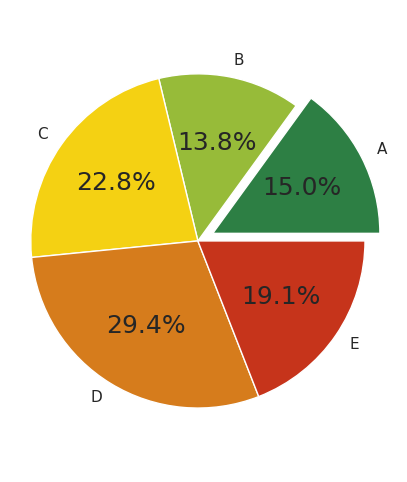

In [15]:
nutscore = ["#2D7F44", "#97BB39", "#F4D113", "#D67C1C", "#C6341B"]

g = viz.RepartitionPlot(data=data, var='nutriscore_grade',
                        plot_type='pie')
g.plot(colors=nutscore, explode=(0.1, 0, 0, 0, 0),
       autopct='%1.1f%%',)
plt.savefig('../reports/figures/nutriscore_pie.png')

### Valeurs _100g

Energie, protéines, graisse, sucres

completion rate -- energy_100g : 100.0 %


mean,std,min,max,median,variance,25%,75%
1142.9567277710516,768.5924148216291,0.0,3979.0,1046.0,590734.3001213431,482.0,1653.0


completion rate -- proteins_100g : 100.0 %


mean,std,min,max,median,variance,25%,75%
8.220469784199848,7.960314217241081,0.0,100.0,6.2,63.366602437210474,2.2,11.9


completion rate -- fat_100g : 100.0 %


mean,std,min,max,median,variance,25%,75%
14.568126645421014,17.752780209687728,0.0,100.0,8.0,315.16120517348025,1.59,22.8


completion rate -- carbohydrates_100g : 100.0 %


mean,std,min,max,median,variance,25%,75%
26.25049135564061,26.529786181795696,0.0,100.0,14.0,703.8295548517979,3.3,51.0


completion rate -- salt_100g : 100.0 %


mean,std,min,max,median,variance,25%,75%
0.952633110074365,2.1918394320502657,0.0,100.0,0.6,4.80416009589043,0.08,1.3


completion rate -- sodium_100g : 100.0 %


mean,std,min,max,median,variance,25%,75%
0.38104731792883667,0.8767392049341904,0.0,40.0,0.24,0.7686716334686364,0.032,0.52


completion rate -- saturated-fat_100g : 100.0 %


mean,std,min,max,median,variance,25%,75%
5.699673919010188,8.352064027960214,0.0,100.0,2.2,69.756973527147,0.4,8.1


completion rate -- sugars_100g : 100.0 %


mean,std,min,max,median,variance,25%,75%
12.837543230636344,18.481891732878648,-0.1,100.0,3.6,341.58032202584815,0.9,17.0


completion rate -- fiber_100g : 100.0 %


mean,std,min,max,median,variance,25%,75%
1.4209469464331679,3.2069965932087605,0.0,100.0,0.0,10.284827148852596,0.0,1.8


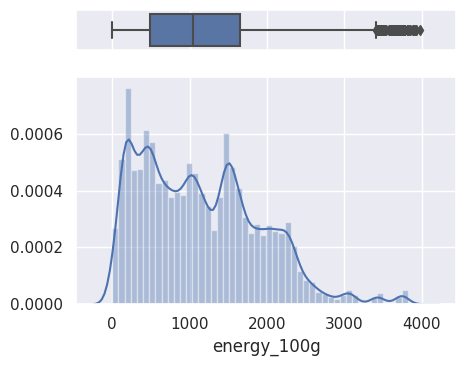

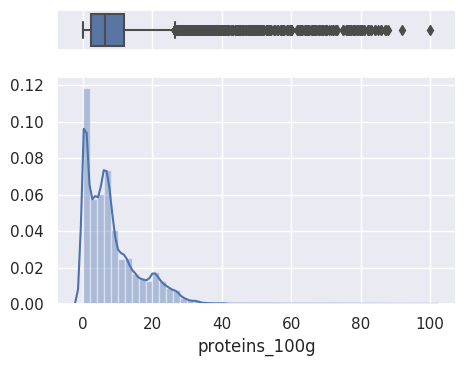

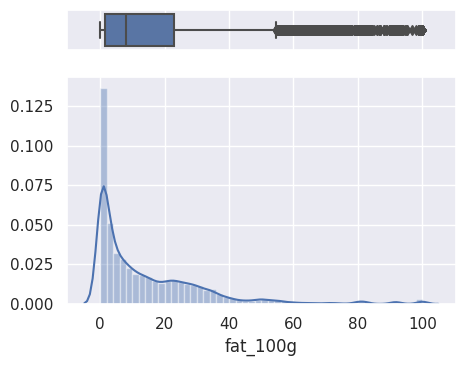

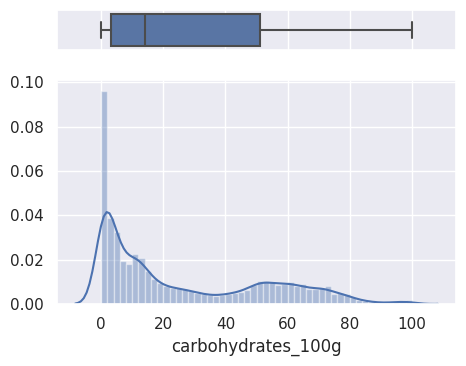

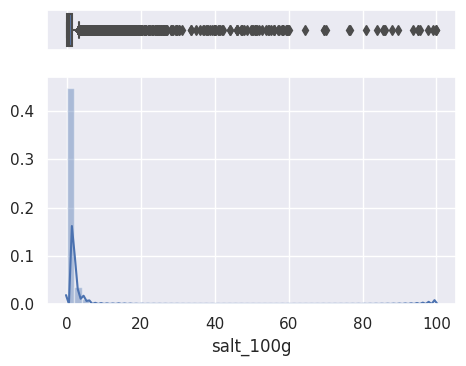

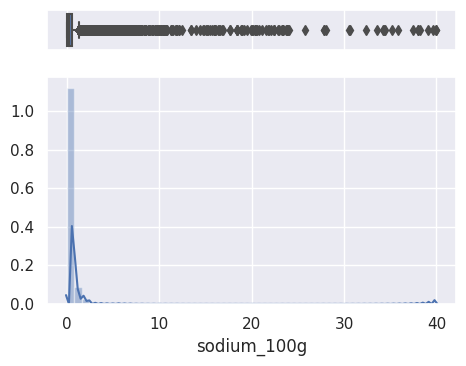

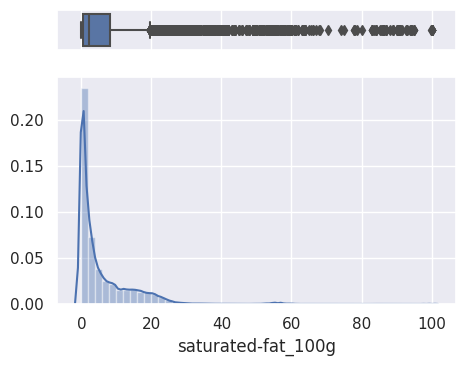

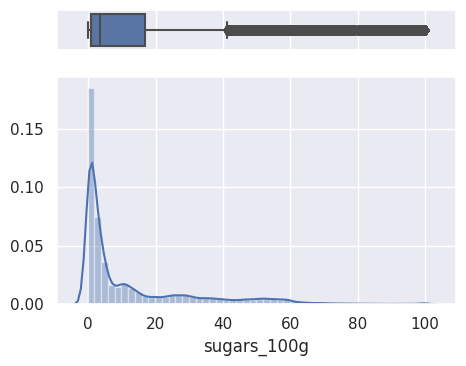

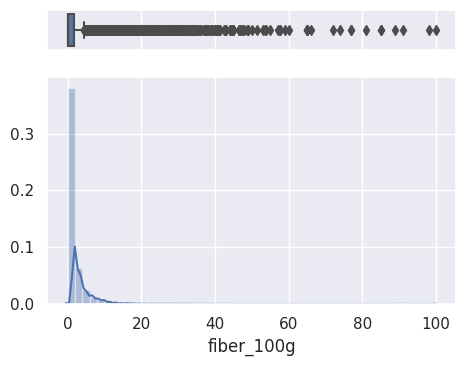

In [16]:
for col in data.columns:
    if col.endswith('_100g'):
        univar.make_analysis(col, save=True)

energy_100g
whishi 3406.0 whislo 0.0
proteins_100g
whishi 26.44 whislo 0.0
fat_100g
whishi 54.6 whislo 0.0
carbohydrates_100g
whishi 100.0 whislo 0.0
No outliers detected
salt_100g
whishi 3.13 whislo 0.0
sodium_100g
whishi 1.252 whislo 0.0
saturated-fat_100g
whishi 19.65 whislo 0.0
sugars_100g
whishi 41.1 whislo -0.1
fiber_100g
whishi 4.5 whislo 0.0


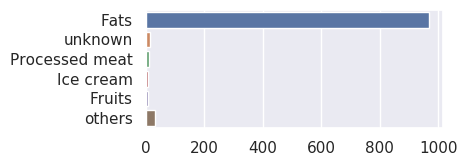

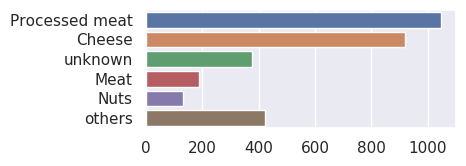

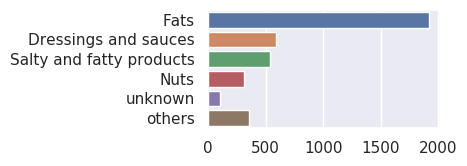

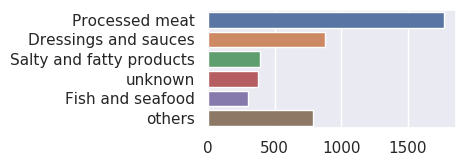

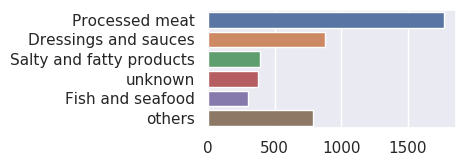

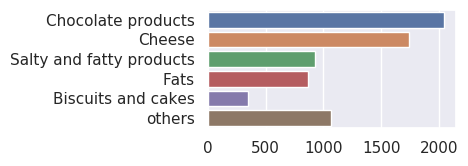

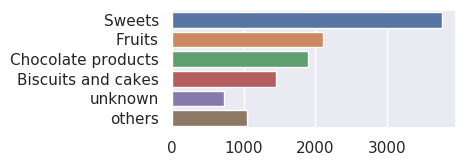

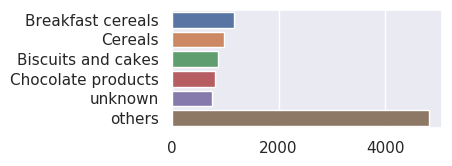

In [17]:
figsize = (5, 2)
for col in data.columns:
    if col.endswith('_100g'):
        print('=' * 80)
        print(col)
        var = 'pnns_groups_2'
        box_stats = boxplot_stats(data[col]).pop(0)
        whishi = box_stats.get('whishi')
        whislo = box_stats.get('whislo')
        print('whishi', whishi, 'whislo', whislo)
        low = data[data[col] < whislo]
        high = data[data[col] > whishi]
        n_class = high[var].drop_duplicates().shape[0]
        if n_class > 5:
            n_class = 5
            others_cat = True
        if low.shape[0] > 0:
            g = viz.RepartitionPlot(data=low, var=var,
                                    plot_type='bar', max_class=n_class)
            g.plot(orient='h', figsize=figsize, others_cat=others_cat)
            plt.tight_layout()
            plt.savefig(f'../reports/figures/outliers_low_{col}.png')
        elif high.shape[0] > 0:
            g = viz.RepartitionPlot(data=high, var=var,
                                    plot_type='bar', max_class=n_class)
            g.plot(orient='h', figsize=figsize, others_cat=others_cat)
            plt.tight_layout()
            plt.savefig(f'../reports/figures/outliers_high_{col}.png')
        else:
            print("No outliers detected")
        print('=' * 80)


### Marques

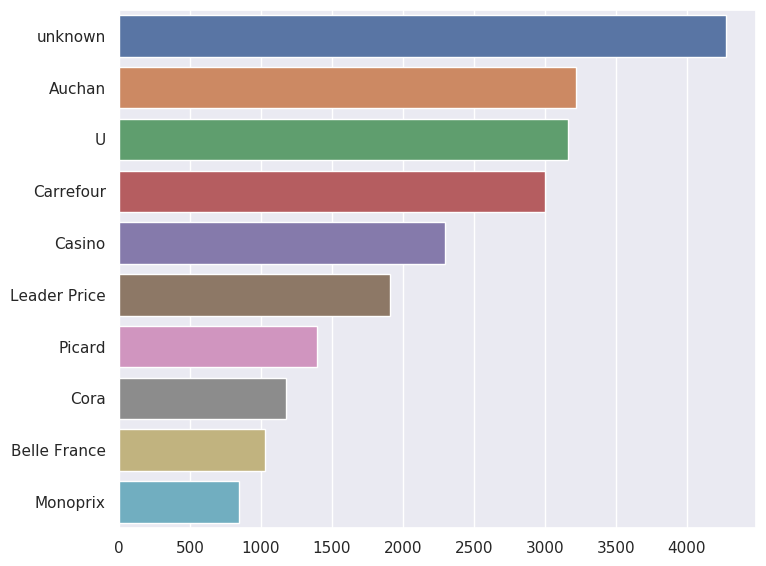

In [18]:
g = viz.RepartitionPlot(data=data, var='brands', plot_type='bar')
g.plot(others_cat=False, orient='h', figsize=(8, 6))
plt.tight_layout()
plt.savefig('../reports/figures/brands_repartition.png')

### PNNS groups

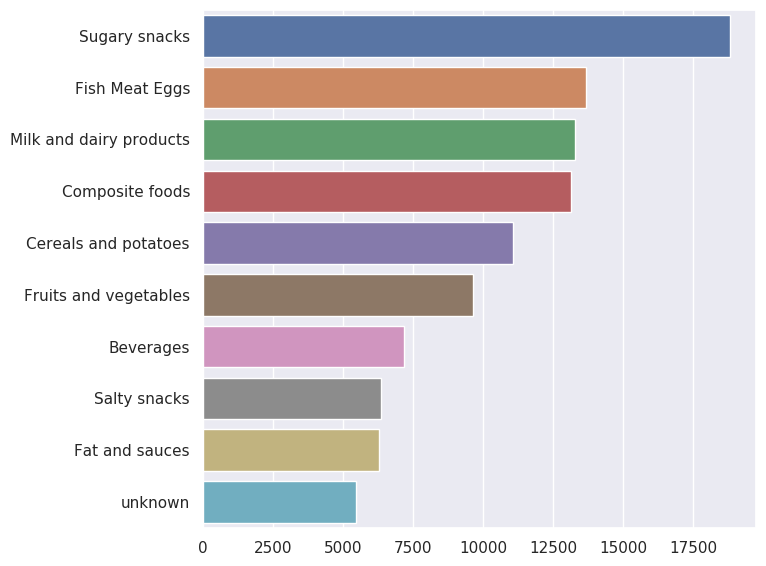

In [19]:
g = viz.RepartitionPlot(data=data, var='pnns_groups_1',
                        plot_type='bar', max_class=10)
g.plot(orient='h', others_cat=False, figsize=(8, 6))
plt.tight_layout()
plt.savefig('../reports/figures/pnns_1_repartition.png')

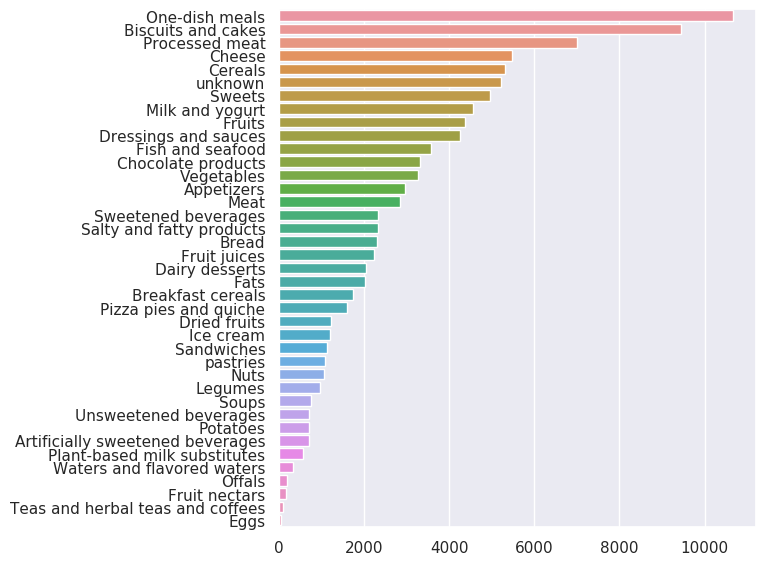

In [20]:
g = viz.RepartitionPlot(data=data, var='pnns_groups_2',
                        plot_type='bar', max_class=39)
g.plot(orient='h', others_cat=False, figsize=(8, 6))
plt.tight_layout()
plt.savefig('../reports/figures/pnns_2_repartition_full.png')

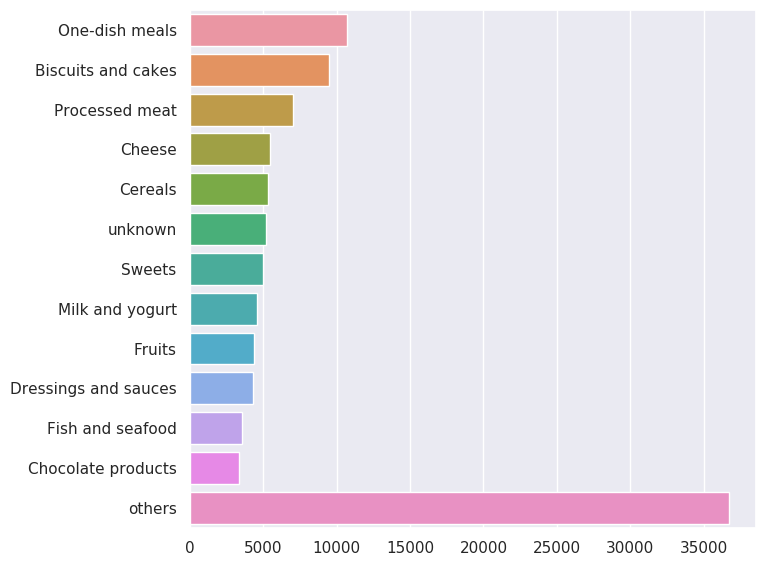

In [21]:
g = viz.RepartitionPlot(data=data, var='pnns_groups_2',
                        plot_type='bar', max_class=12)
g.plot(orient='h', others_cat=True, figsize=(8, 6))
plt.tight_layout()
plt.savefig('../reports/figures/pnns_2_repartion_compact.png')

## Bivariées

In [22]:
# TODO: stacked-bar, hue is hardcoded for now

### Marques / Nutriscore

In [23]:
nutriscore_logo = mpimg.imread('../reports/figures/logos/nutriscore.png')

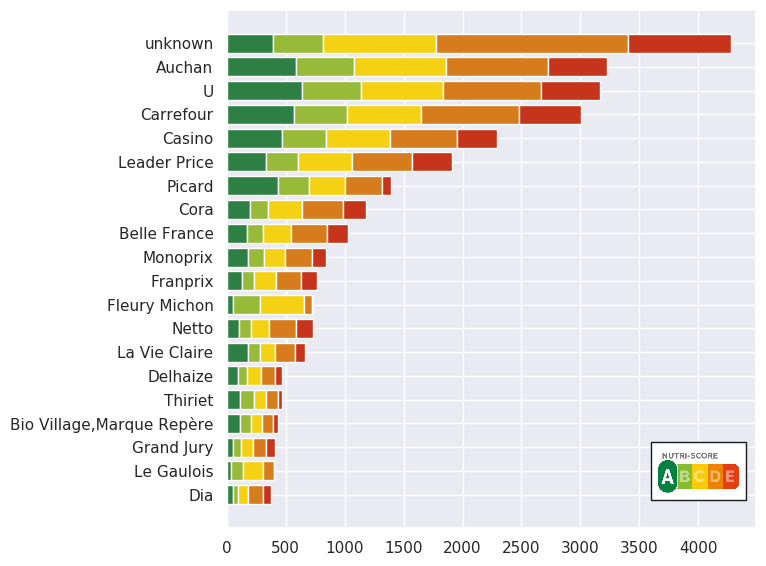

In [24]:
g = viz.RepartitionPlot(data=data, var='brands',
                        plot_type='stacked-bar', max_class=20)
g.plot(others_cat=False, colors=nutscore, figsize=(8, 6))

imagebox = OffsetImage(nutriscore_logo, zoom=0.25)
ab = AnnotationBbox(imagebox, (4000, 1))
ax = plt.gca()
ax.add_artist(ab)
ax.legend_ = None
plt.tight_layout()
plt.savefig('../reports/figures/brands_nutscore_repartition.png')

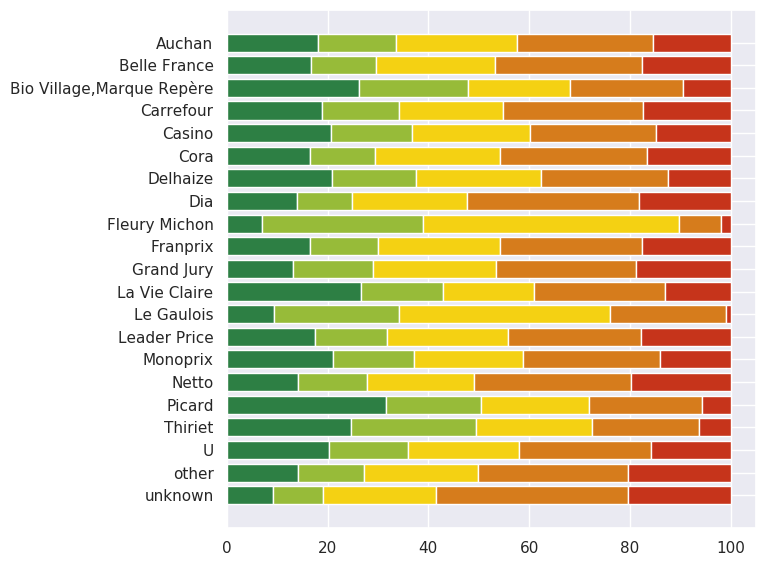

In [25]:
g = viz.RepartitionPlot(data=data, var='brands', plot_type='stacked-bar',
                        max_class=20)
g.plot(others_cat=True, colors=nutscore, frequency=True,
       sort='labels', ascending=False, figsize=(8, 6))

ax = plt.gca()
ax.legend_ = None
plt.tight_layout()
plt.savefig('../reports/figures/brands_nutscore_repartition_freq.png')

### PNNS groups / Nutriscore

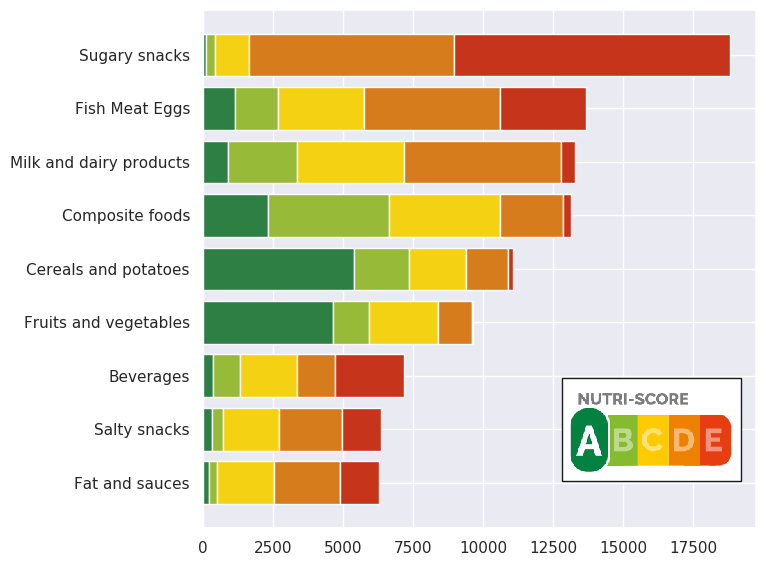

In [26]:
g = viz.RepartitionPlot(data=data, var='pnns_groups_1',
                        plot_type='stacked-bar', max_class=9)
g.plot(others_cat=False, orient='h', colors=nutscore,
       figsize=(8, 6))
imagebox = OffsetImage(nutriscore_logo, zoom=0.5)
ab = AnnotationBbox(imagebox, (16000, 1))
ax = plt.gca()
ax.add_artist(ab)
ax.legend_ = None
plt.tight_layout()
plt.savefig('../reports/figures/pnns1_nutscore_repartition.png')

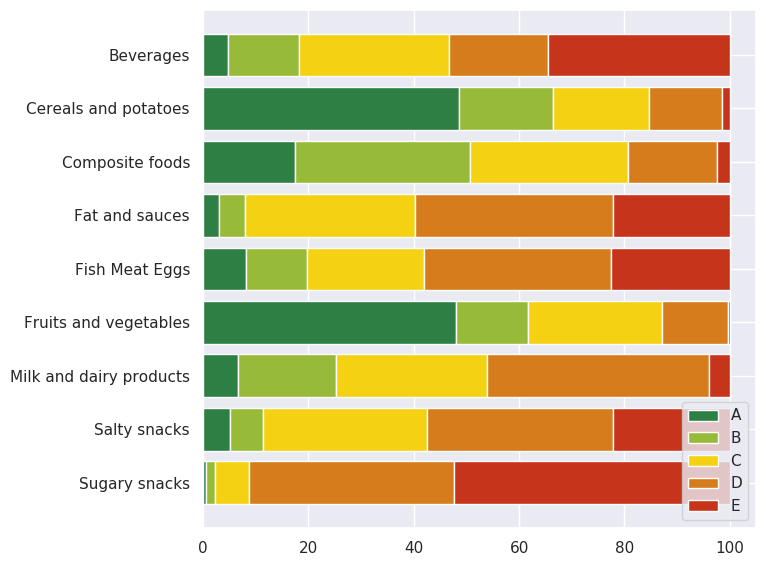

In [27]:
g = viz.RepartitionPlot(data=data, var='pnns_groups_1',
                        plot_type='stacked-bar', max_class=9)
g.plot(orient='h', colors=nutscore, others_cat=False, frequency=True,
       sort='labels', ascending=False, figsize=(8, 6))
plt.tight_layout()
plt.savefig('../reports/figures/pnns1_nutscore_repartition_freq.png')

In [28]:
cont = data.groupby(['pnns_groups_1', 'nutriscore_grade'])\
.size().reset_index().pivot(columns='pnns_groups_1', index='nutriscore_grade', values=0)
cont = cont.astype(int)

In [29]:
cont['Sum'] = cont.sum(axis=1)
cont.T.to_latex('../reports/latex-report/contingency_tab.tex')

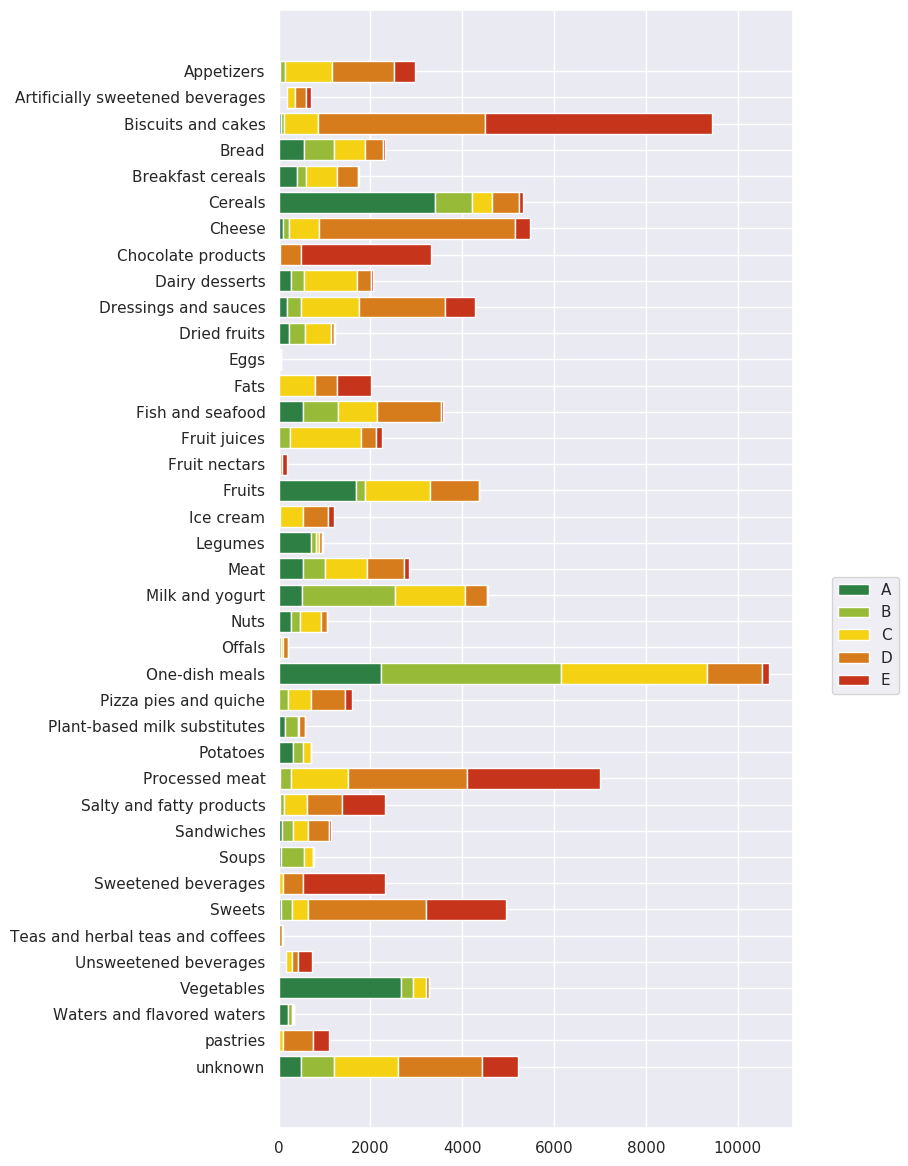

In [30]:
g = viz.RepartitionPlot(data=data, var='pnns_groups_2',
                        plot_type='stacked-bar',
                        max_class=45)
g.plot(orient='h', colors=nutscore, others_cat=False, frequency=False,
       sort='labels', ascending=False, figsize=(10, 12))
plt.legend(loc='upper right', bbox_to_anchor=(1.22, 0.5))
plt.tight_layout()
plt.savefig('../reports/figures/pnns_2_nutscore_repartition.png')

### Lien entre la valeur énergétique et les nutriments

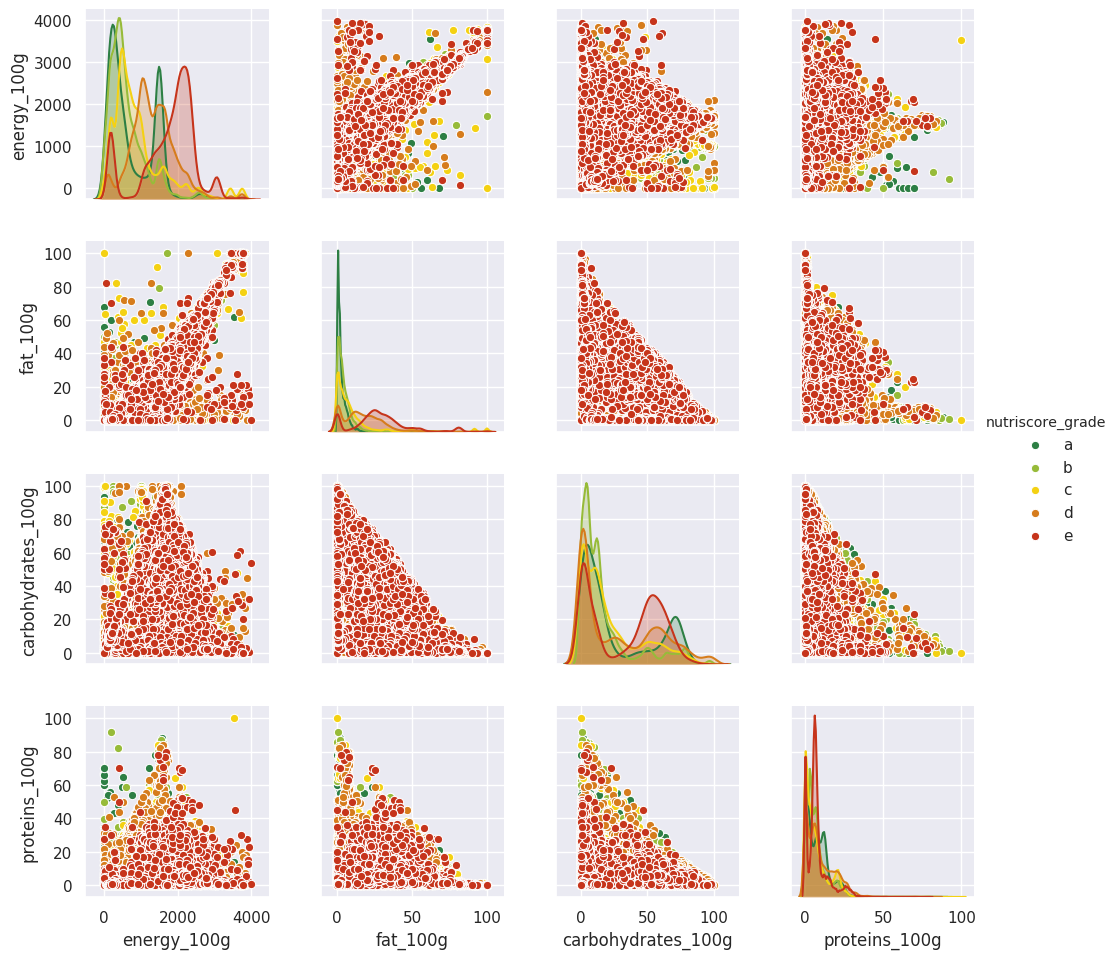

In [31]:
sns.pairplot(data[['energy_100g', 'fat_100g',
                   'carbohydrates_100g', 'proteins_100g',
                   'nutriscore_grade']], hue="nutriscore_grade",
             palette=nutscore)
#plt.tight_layout()
plt.savefig('../reports/figures/relational_plot.png')

### Valeur énergétique / Nutriscore

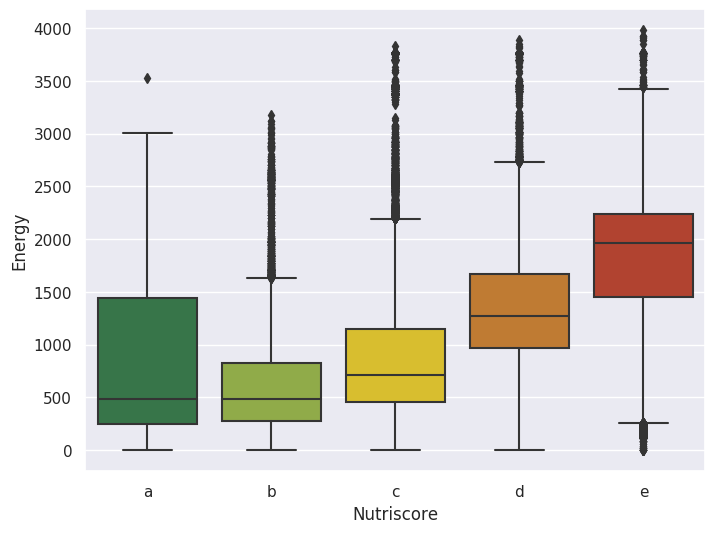

In [32]:
g = viz.RepartitionPlot(data=data, var='energy_100g', plot_type='boxplot')
g.plot(hue='nutriscore_grade', palette=nutscore, figsize=(8, 6))
plt.xlabel('Nutriscore')
plt.ylabel('Energy')
plt.savefig('../reports/figures/box_plot_energy_nutscore.png')

score A
whishi 3003.0 whislo 0.0
score B
whishi 1632.0 whislo 0.0
score C
whishi 2192.0 whislo 0.0
score D
whishi 2728.0 whislo 0.0
score E
whishi 3427.0 whislo 260.0


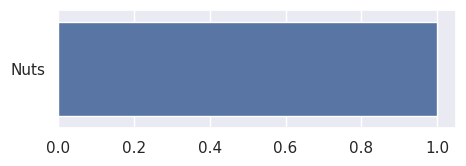

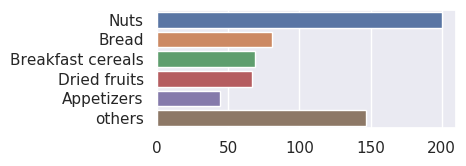

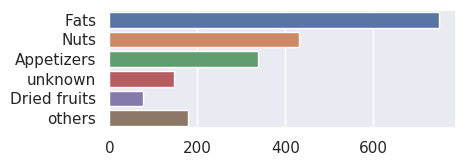

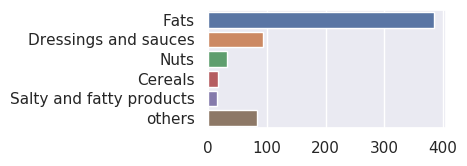

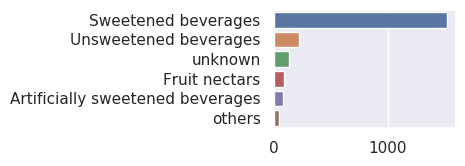

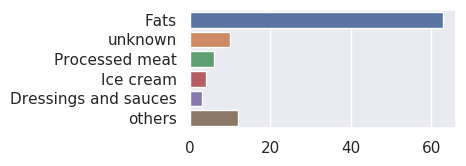

In [33]:
figsize=(5, 2)
for score in range(ord('a'), ord('f')):
    var = 'pnns_groups_2'
    others_cat = False
    score = chr(score)
    print(f'score {score.upper()}')
    _data = data[data['nutriscore_grade'] == score]
    box_stats = boxplot_stats(_data['energy_100g']).pop(0)
    whishi = box_stats.get('whishi')
    whislo = box_stats.get('whislo')
    print('whishi', whishi, 'whislo', whislo)
    low = _data[_data['energy_100g'] < whislo]
    high = _data[_data['energy_100g'] > whishi]
    n_class = high[var].drop_duplicates().shape[0]
    if n_class > 5:
            n_class = 5
            others_cat = True
    if low.shape[0] > 0:
        g = viz.RepartitionPlot(data=low, var=var,
                                plot_type='bar', max_class=n_class)
        g.plot(orient='h', figsize=figsize, others_cat=others_cat)
        plt.tight_layout()
        plt.savefig(f'../reports/figures/outliers_low_{score.upper()}.png')
    if high.shape[0] > 0:
        g = viz.RepartitionPlot(data=high, var=var,
                                plot_type='bar', max_class=n_class)
        g.plot(orient='h', figsize=figsize, others_cat=others_cat)
        plt.tight_layout()
        plt.savefig(f'../reports/figures/outliers_high_{score.upper()}.png')
    print('=' * 80)

### Valeur énergétique selon le groupe PNNS 1

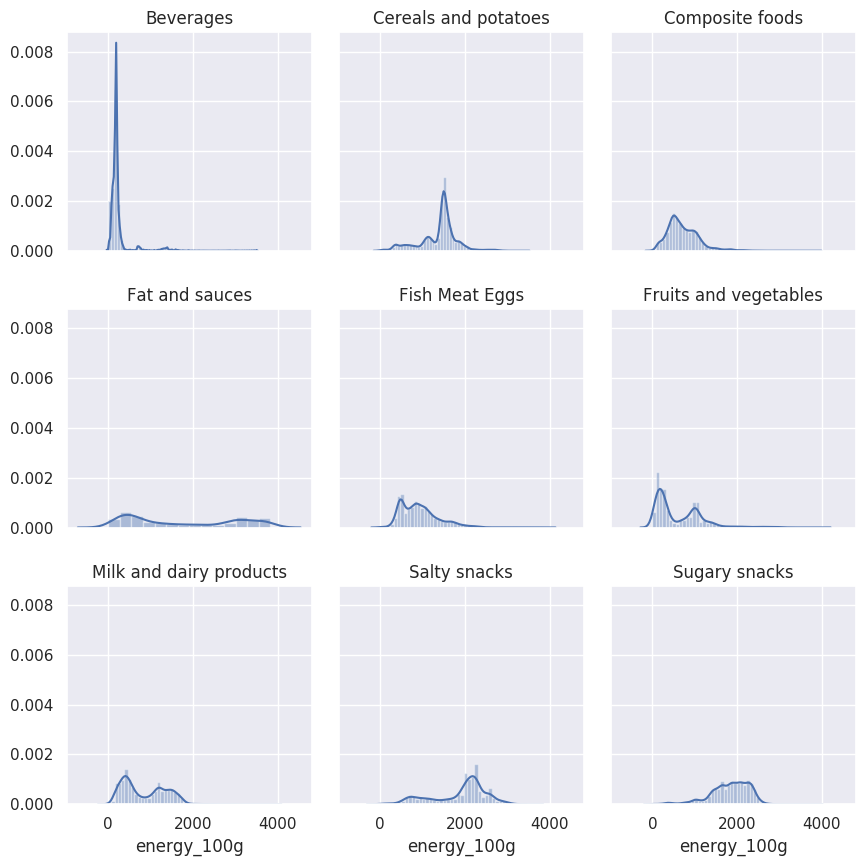

In [34]:
fig, axes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(9, 9))
pnns_groups = data['pnns_groups_1'].drop_duplicates().values
pnns_groups = pnns_groups.tolist()
pnns_groups.remove('unknown')
pnns_groups.sort()
for group, ax, i in zip(pnns_groups, axes.reshape(-1),
                     range(len(pnns_groups))):
    # print(group, ax)
    _data = data[data['pnns_groups_1'] == group]
    sns.distplot(_data['energy_100g'], ax=ax, kde=True)
    ax.set_title(group)
    if i < 6:
        ax.set_xlabel("")
plt.subplots_adjust(wspace=0.05, hspace=0.2)
plt.tight_layout()
plt.savefig('../reports/figures/dist_energy_pnns1.png')

### groupes PNNS: catégorie d'aliment et nutriments moyens /100g

Fat and sauces


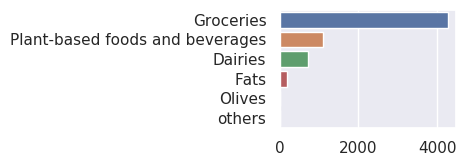

Composite foods


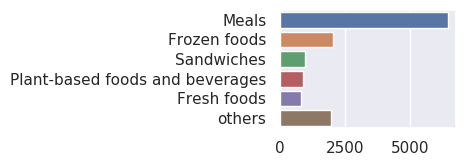

Milk and dairy products


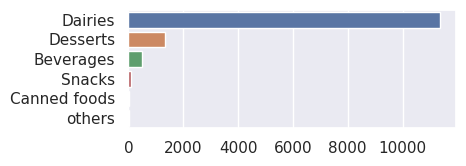

Fruits and vegetables


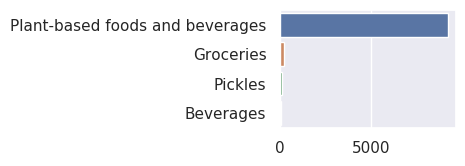

Sugary snacks


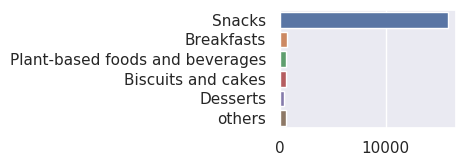

Beverages


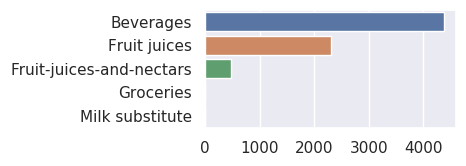

unknown


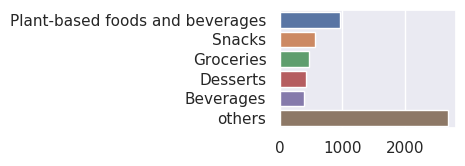

Salty snacks


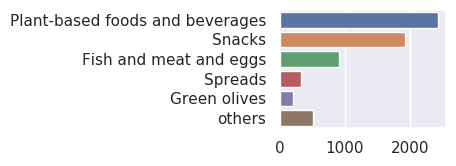

Fish Meat Eggs


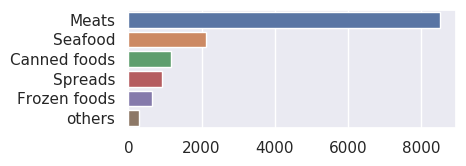

Cereals and potatoes


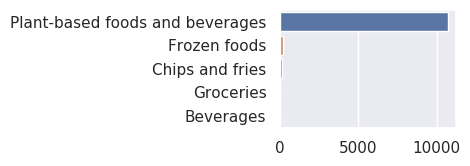

In [35]:
figsize = (5, 2)
for group in data['pnns_groups_1'].drop_duplicates().values:
    print(group)
    n_class = len(data[data['pnns_groups_1'] == group]['main_category_en']\
    .drop_duplicates().values)
    others_cat = False
    if n_class > 5:
        n_class = 5
        others_cat = True
    g = viz.RepartitionPlot(data[data['pnns_groups_1'] == group], 
                            var='main_category_en', plot_type='bar',
                            max_class=n_class)
    g.plot(orient='h', figsize=figsize, others_cat=others_cat)
    plt.tight_layout()
    plt.savefig(f'../reports/figures/pnns_group_{group}.png')
    plt.show()

Fat and sauces


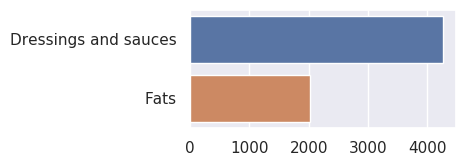

Composite foods


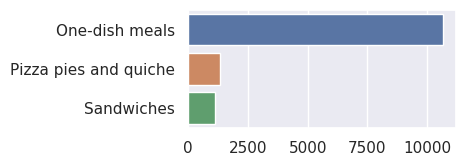

Milk and dairy products


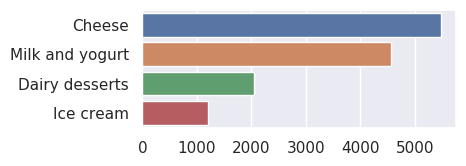

Fruits and vegetables


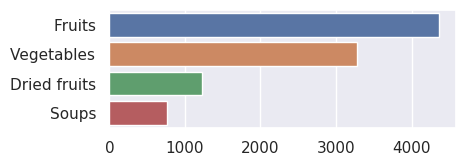

Sugary snacks


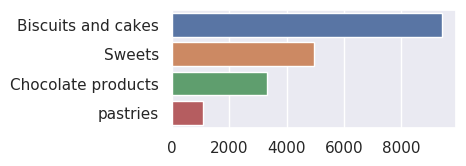

Beverages


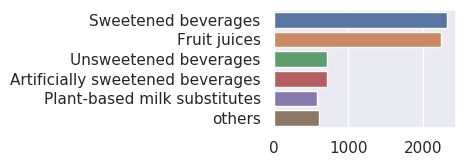

unknown


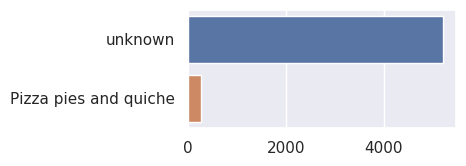

Salty snacks


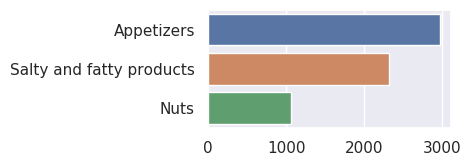

Fish Meat Eggs


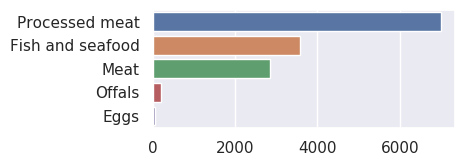

Cereals and potatoes


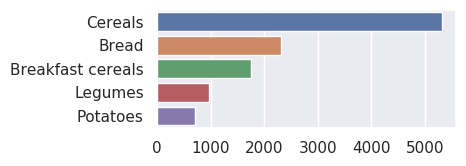

In [36]:
for group in data['pnns_groups_1'].drop_duplicates().values:
    print(group)
    n_class = len(data[data['pnns_groups_1'] == group]['pnns_groups_2']\
    .drop_duplicates().values)
    others_cat = False
    if n_class > 5:
        n_class = 5
        others_cat = True
    g = viz.RepartitionPlot(data[data['pnns_groups_1'] == group], 
                            var='pnns_groups_2', plot_type='bar',
                            max_class=n_class)
    g.plot(orient='h', figsize=figsize, others_cat=others_cat)
    plt.tight_layout()
    plt.savefig(f'../reports/figures/pnns_1_2_{group}.png')
    plt.show()

Version control

In [37]:
commit = input('Commit ?')
if not commit:
    raise ValueError()

Commit ? 


ValueError: 

In [ ]:
!git commit ./3.0-tg-uni-bi-variate-analysis.ipynb -m ":construction_worker: All figures saved"